In [302]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [303]:
diabetes_dataset = pd.read_csv('diabetes.csv')

In [304]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [305]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [306]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [307]:
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [308]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [309]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [310]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [311]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [312]:
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [313]:
Y_pred_svm = svm_classifier.predict(X_test)

In [314]:
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
precision_svm = precision_score(Y_test, Y_pred_svm)
recall_svm = recall_score(Y_test, Y_pred_svm)
f1_svm = f1_score(Y_test, Y_pred_svm)
f2_svm = fbeta_score(Y_test, Y_pred_svm, beta=2)

In [315]:
print("SVM:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)
print("F2 Score:", f2_svm)

SVM:
Accuracy: 0.7727272727272727
Precision: 0.7567567567567568
Recall: 0.5185185185185185
F1 Score: 0.6153846153846154
F2 Score: 0.5533596837944664


In [316]:
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train, Y_train)


LogisticRegression(max_iter=1000)

In [317]:
Y_pred_lr = lr_classifier.predict(X_test)

In [318]:
accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
precision_lr = precision_score(Y_test, Y_pred_lr)
recall_lr = recall_score(Y_test, Y_pred_lr)
f1_lr = f1_score(Y_test, Y_pred_lr)
f2_lr = fbeta_score(Y_test, Y_pred_lr, beta=2)

In [319]:
print("Logistic Regression:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)
print("F2 Score:", f2_lr)

Logistic Regression:
Accuracy: 0.7597402597402597
Precision: 0.717948717948718
Recall: 0.5185185185185185
F1 Score: 0.6021505376344085
F2 Score: 0.5490196078431372


In [320]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, Y_train)


RandomForestClassifier()

In [321]:
Y_pred_rf = rf_classifier.predict(X_test)

In [322]:
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
precision_rf = precision_score(Y_test, Y_pred_rf)
recall_rf = recall_score(Y_test, Y_pred_rf)
f1_rf = f1_score(Y_test, Y_pred_rf)
f2_rf = fbeta_score(Y_test, Y_pred_rf, beta=2)

In [323]:
print("Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("F2 Score:", f2_rf)

Random Forest:
Accuracy: 0.7467532467532467
Precision: 0.6923076923076923
Recall: 0.5
F1 Score: 0.5806451612903226
F2 Score: 0.5294117647058824


In [324]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, Y_train)


KNeighborsClassifier()

In [325]:
Y_pred_knn = knn_classifier.predict(X_test)

In [326]:
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
precision_knn = precision_score(Y_test, Y_pred_knn)
recall_knn = recall_score(Y_test, Y_pred_knn)
f1_knn = f1_score(Y_test, Y_pred_knn)
f2_knn = fbeta_score(Y_test, Y_pred_knn, beta=2)

In [327]:
print("K-Nearest Neighbors (KNN):")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)
print("F2 Score:", f2_knn)

K-Nearest Neighbors (KNN):
Accuracy: 0.7272727272727273
Precision: 0.6666666666666666
Recall: 0.4444444444444444
F1 Score: 0.5333333333333333
F2 Score: 0.47619047619047616


In [328]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)

GaussianNB()

In [329]:
Y_pred_nb = nb_classifier.predict(X_test)

In [330]:
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
precision_nb = precision_score(Y_test, Y_pred_nb)
recall_nb = recall_score(Y_test, Y_pred_nb)
f1_nb = f1_score(Y_test, Y_pred_nb)
f2_nb = fbeta_score(Y_test, Y_pred_nb, beta=2)

In [331]:
print("Naive Bayes:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)
print("F2 Score:", f2_nb)

Naive Bayes:
Accuracy: 0.7727272727272727
Precision: 0.7209302325581395
Recall: 0.5740740740740741
F1 Score: 0.6391752577319588
F2 Score: 0.5984555984555985


In [332]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [333]:
Y_pred_dt = dt_classifier.predict(X_test)

In [334]:
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
precision_dt = precision_score(Y_test, Y_pred_dt)
recall_dt = recall_score(Y_test, Y_pred_dt)
f1_dt = f1_score(Y_test, Y_pred_dt)
f2_dt = fbeta_score(Y_test, Y_pred_dt, beta=2)

In [335]:
print("Decision Tree:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)
print("F2 Score:", f2_dt)

Decision Tree:
Accuracy: 0.6883116883116883
Precision: 0.5681818181818182
Recall: 0.46296296296296297
F1 Score: 0.5102040816326532
F2 Score: 0.4807692307692308


In [336]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, Y_train)

GradientBoostingClassifier()

In [337]:
Y_pred_gb = gb_classifier.predict(X_test)

In [338]:
accuracy_gb = accuracy_score(Y_test, Y_pred_gb)
precision_gb = precision_score(Y_test, Y_pred_gb)
recall_gb = recall_score(Y_test, Y_pred_gb)
f1_gb = f1_score(Y_test, Y_pred_gb)
f2_gb = fbeta_score(Y_test, Y_pred_gb, beta=2)

In [339]:
print("Gradient Boosting:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)
print("F2 Score:", f2_gb)

Gradient Boosting:
Accuracy: 0.7077922077922078
Precision: 0.6097560975609756
Recall: 0.46296296296296297
F1 Score: 0.5263157894736843
F2 Score: 0.4863813229571985


In [340]:
ab_classifier = AdaBoostClassifier()
ab_classifier.fit(X_train, Y_train)

AdaBoostClassifier()

In [341]:
Y_pred_ab = ab_classifier.predict(X_test)

In [342]:
accuracy_ab = accuracy_score(Y_test, Y_pred_ab)
precision_ab = precision_score(Y_test, Y_pred_ab)
recall_ab = recall_score(Y_test, Y_pred_ab)
f1_ab = f1_score(Y_test, Y_pred_ab)
f2_ab = fbeta_score(Y_test, Y_pred_ab, beta=2)

In [343]:
print("AdaBoost:")
print("Accuracy:", accuracy_ab)
print("Precision:", precision_ab)
print("Recall:", recall_ab)
print("F1 Score:", f1_ab)
print("F2 Score:", f2_ab)

AdaBoost:
Accuracy: 0.7142857142857143
Precision: 0.6190476190476191
Recall: 0.48148148148148145
F1 Score: 0.5416666666666666
F2 Score: 0.5038759689922481


In [344]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [345]:
Y_pred_xgb = xgb_classifier.predict(X_test)

In [346]:
accuracy_xgb = accuracy_score(Y_test, Y_pred_xgb)
precision_xgb = precision_score(Y_test, Y_pred_xgb)
recall_xgb = recall_score(Y_test, Y_pred_xgb)
f1_xgb = f1_score(Y_test, Y_pred_xgb)
f2_xgb = fbeta_score(Y_test, Y_pred_xgb, beta=2)

In [347]:
print("XGBoost:")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)
print("F2 Score:", f2_xgb)

XGBoost:
Accuracy: 0.7402597402597403
Precision: 0.6521739130434783
Recall: 0.5555555555555556
F1 Score: 0.6
F2 Score: 0.5725190839694657


In [348]:
models = {
    "SVM": svm.SVC(kernel='linear'),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": xgb.XGBClassifier()
}

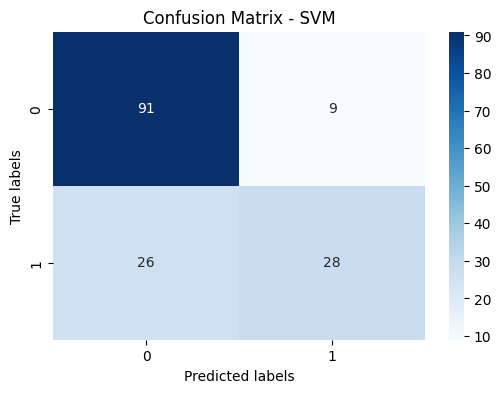

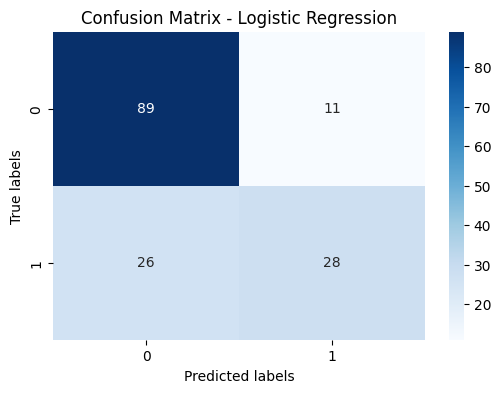

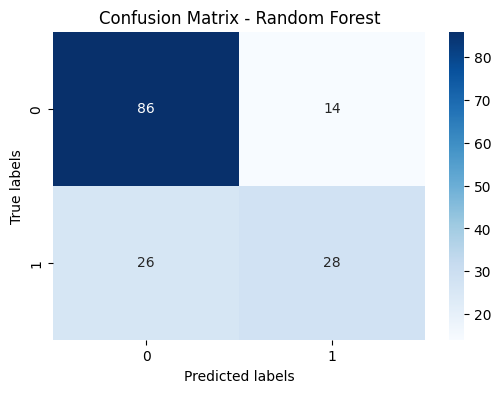

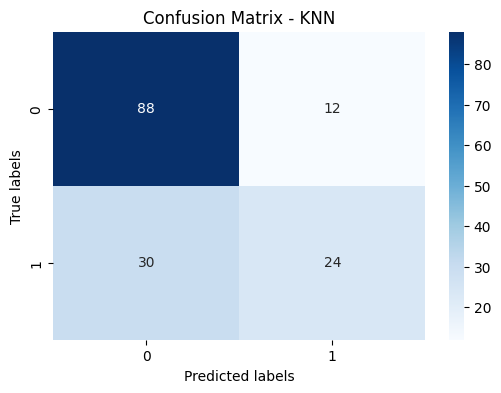

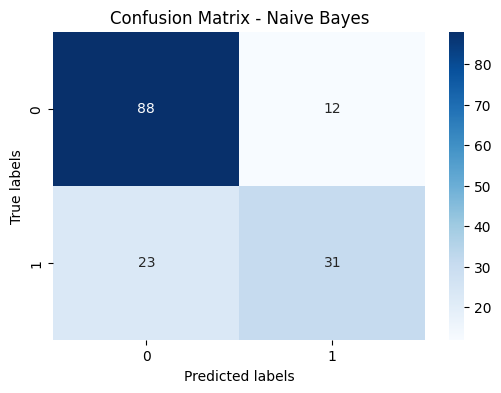

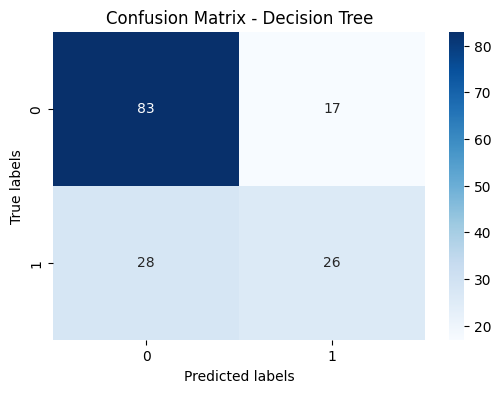

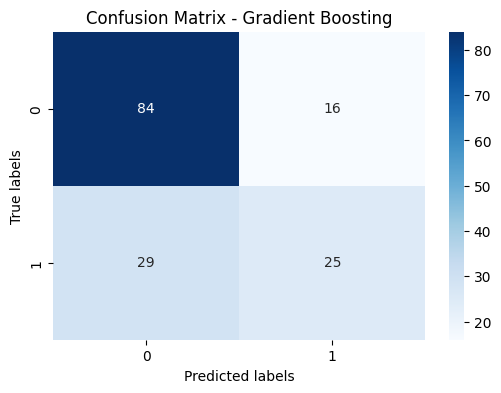

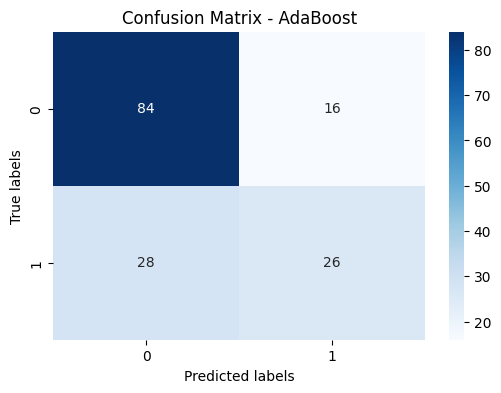

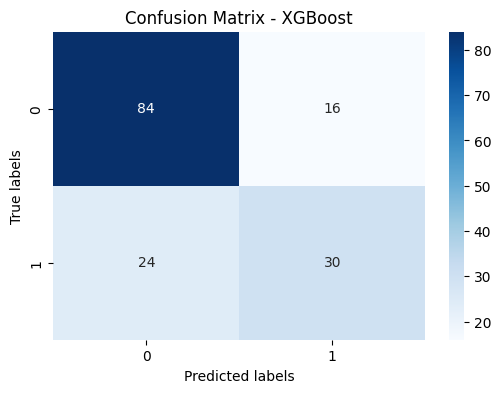

In [349]:
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    conf_matrix = confusion_matrix(Y_test, Y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


In [350]:
results = []
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    f2 = fbeta_score(Y_test, Y_pred, beta=2)

    results.append([name, accuracy, precision, recall, f1, f2])

In [351]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score"])

In [352]:
best_model = results_df.loc[results_df['F2 Score'].idxmax()]

In [353]:
print("Best Model:")
print(best_model)

Best Model:
Model        Naive Bayes
Accuracy        0.772727
Precision        0.72093
Recall          0.574074
F1 Score        0.639175
F2 Score        0.598456
Name: 4, dtype: object


In [354]:
best_model_name = best_model['Model']
best_model_obj = models[best_model_name]

In [355]:
input_data = (5,166,72,19,175,25.8,0.587,51)
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)

In [356]:
best_model_obj.fit(X, Y)
prediction = best_model_obj.predict(input_data_as_numpy_array)
prediction = loaded_model.predict(input_data_as_numpy_array)
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [357]:
if prediction[0] == 0:
    print("The person is not diabetic")
else:
    print("The person is diabetic")

The person is diabetic


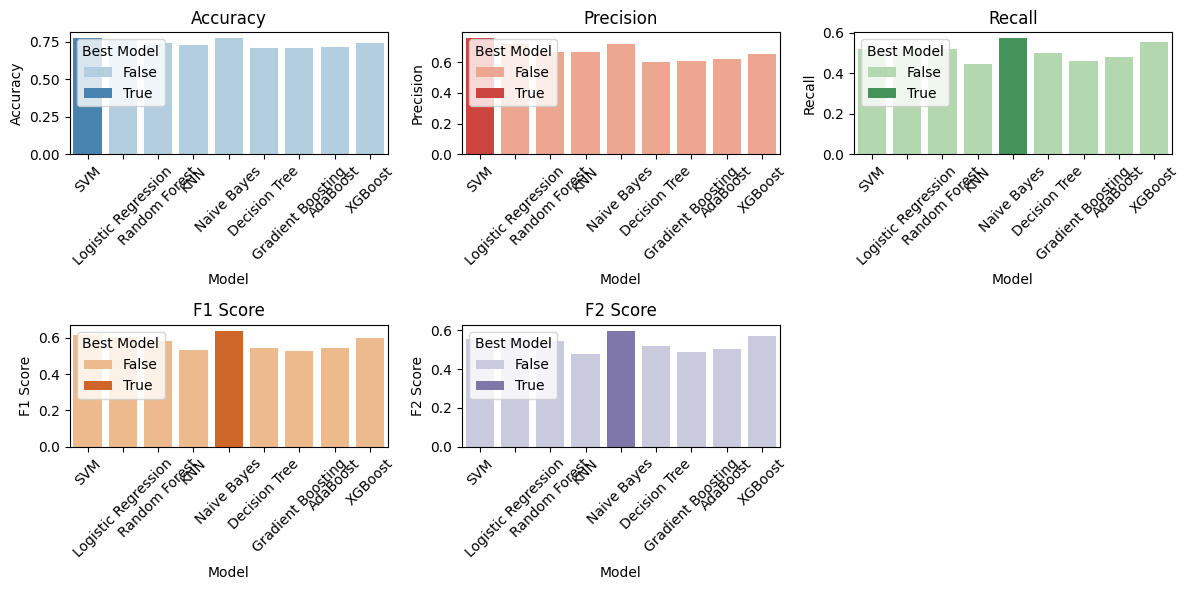

In [358]:
results_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score"])
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    f2 = fbeta_score(Y_test, Y_pred, beta=2)
    results_df = pd.concat([results_df, pd.DataFrame({"Model": [name], "Accuracy": [accuracy],
                                                       "Precision": [precision], "Recall": [recall],
                                                       "F1 Score": [f1], "F2 Score": [f2]})], ignore_index=True)

best_models = {}
for metric in ["Accuracy", "Precision", "Recall", "F1 Score", "F2 Score"]:
    best_model = results_df.loc[results_df[metric].idxmax()]["Model"]
    best_models[metric] = best_model

results_df["Best Accuracy"] = results_df["Model"].apply(lambda x: x == best_models["Accuracy"])
results_df["Best Precision"] = results_df["Model"].apply(lambda x: x == best_models["Precision"])
results_df["Best Recall"] = results_df["Model"].apply(lambda x: x == best_models["Recall"])
results_df["Best F1 Score"] = results_df["Model"].apply(lambda x: x == best_models["F1 Score"])
results_df["Best F2 Score"] = results_df["Model"].apply(lambda x: x == best_models["F2 Score"])

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="Blues", hue="Best Accuracy")
plt.title("Accuracy")
plt.xticks(rotation=45)
plt.legend(title="Best Model", loc="upper left")
plt.tight_layout()

plt.subplot(2, 3, 2)
sns.barplot(x="Model", y="Precision", data=results_df, palette="Reds", hue="Best Precision")
plt.title("Precision")
plt.xticks(rotation=45)
plt.legend(title="Best Model", loc="upper left")
plt.tight_layout()

plt.subplot(2, 3, 3)
sns.barplot(x="Model", y="Recall", data=results_df, palette="Greens", hue="Best Recall")
plt.title("Recall")
plt.xticks(rotation=45)
plt.legend(title="Best Model", loc="upper left")
plt.tight_layout()

plt.subplot(2, 3, 4)
sns.barplot(x="Model", y="F1 Score", data=results_df, palette="Oranges", hue="Best F1 Score")
plt.title("F1 Score")
plt.xticks(rotation=45)
plt.legend(title="Best Model", loc="upper left")
plt.tight_layout()

plt.subplot(2, 3, 5)
sns.barplot(x="Model", y="F2 Score", data=results_df, palette="Purples", hue="Best F2 Score")
plt.title("F2 Score")
plt.xticks(rotation=45)
plt.legend(title="Best Model", loc="upper left")
plt.tight_layout()

plt.show()
